In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

t_max = 150e-3   # second
dt = 1e-3        # second
tau = 20e-3      # second
el = -60e-3      # milivolt
vr = -70e-3      # milivolt
vth = -50e-3     # milivolt
r = 100e6        # ohm
i_mean = 25e-11  # ampere

print(t_max, dt, tau, el, vr, vth, r, i_mean)

0.15 0.001 0.02 -0.06 -0.07 -0.05 100000000.0 2.5e-10


### Plotting Histograms

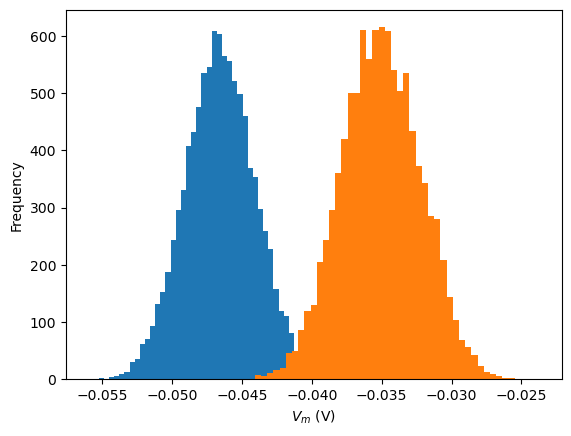

In [18]:
np.random.seed(2020)
t_range = np.arange(0, t_max, dt)
step_end = len(t_range)
n = 10000
v_n = el * np.ones([n, step_end])
i = i_mean * (1 + 0.1 * (t_max / dt)**(0.5) * (2 * np.random.random([n, step_end]) - 1))
nbins = 50
for step, t in enumerate(t_range):
    if step == 0:
        continue
    v_n[:, step] =  v_n[:, step - 1] + (dt / tau) * (el - v_n[:, step - 1] + r * i[:, step])
plt.figure()
plt.ylabel('Frequency')
plt.xlabel('$V_m$ (V)')
plt.hist(v_n[:,int(step_end / 10)], nbins, histtype='stepfilled',linewidth=0, label=f't={t_max / 10} s')
plt.hist(v_n[:, -1], nbins, histtype='stepfilled',linewidth=0, label=f't={t_max} s')
plt.show()

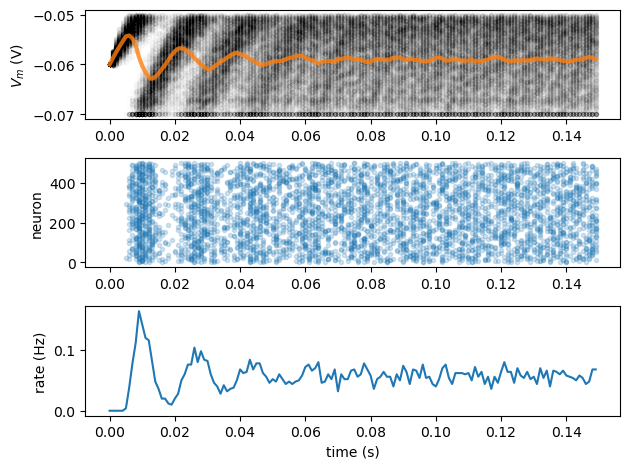

In [24]:
np.random.seed(2020)
t_range = np.arange(0, t_max, dt)
step_end = len(t_range)
n = 500
v_n = el * np.ones([n, step_end])
i = i_mean * (1 + 0.1 * (t_max / dt)**(0.5) * (2 * np.random.random([n, step_end]) - 1))

# Initialize spikes and spikes_n
spikes = {j: [] for j in range(n)}
spikes_n = np.zeros([step_end])

for step, t in enumerate(t_range):
    if step == 0:
        continue
    v_n[:, step] = v_n[:, step - 1] + (dt / tau) * (el - v_n[:, step - 1] + r*i[:, step])

    for j in range(n):
        if v_n[j, step] > vth:
            v_n[j, step] = vr
            spikes[j] += [t]
            spikes_n[step] += 1

v_mean = np.mean(v_n, axis=0)
spikes_mean =  spikes_n / n
plt.figure()

# Plot simulations and sample mean
ax1 = plt.subplot(3, 1, 1)
for j in range(n):
  plt.scatter(t_range, v_n[j], color="k", marker=".", alpha=0.01)
plt.plot(t_range, v_mean, 'C1', alpha=0.8, linewidth=3)
plt.ylabel('$V_m$ (V)')

plt.subplot(3, 1, 2, sharex=ax1)
# for each neuron j: collect spike times and plot them at height j
for j in range(n):
  times = np.array(spikes[j])
  plt.scatter(times, j * np.ones_like(times), color="C0", marker=".", alpha=0.2)

plt.ylabel('neuron')

# Plot firing rate
plt.subplot(3, 1, 3, sharex=ax1)
plt.plot(t_range, spikes_mean)
plt.xlabel('time (s)')
plt.ylabel('rate (Hz)')

plt.tight_layout()

In [25]:
def plot_all(t_range, v, raster=None, spikes=None, spikes_mean=None):
  """
  Plots Time evolution for
  (1) multiple realizations of membrane potential
  (2) spikes
  (3) mean spike rate (optional)

  Args:
    t_range (numpy array of floats)
        range of time steps for the plots of shape (time steps)

    v (numpy array of floats)
        membrane potential values of shape (neurons, time steps)

    raster (numpy array of floats)
        spike raster of shape (neurons, time steps)

    spikes (dictionary of lists)
        list with spike times indexed by neuron number

    spikes_mean (numpy array of floats)
        Mean spike rate for spikes as dictionary

  Returns:
    Nothing.
  """

  v_mean = np.mean(v, axis=0)
  fig_w, fig_h = plt.rcParams['figure.figsize']
  plt.figure(figsize=(fig_w, 1.5 * fig_h))

  ax1 = plt.subplot(3, 1, 1)
  for j in range(n):
    plt.scatter(t_range, v[j], color="k", marker=".", alpha=0.01)
  plt.plot(t_range, v_mean, 'C1', alpha=0.8, linewidth=3)
  plt.xticks([])
  plt.ylabel(r'$V_m$ (V)')

  if raster is not None:
    plt.subplot(3, 1, 2)
    spikes_mean = np.mean(raster, axis=0)
    plt.imshow(raster, cmap='Greys', origin='lower', aspect='auto')

  else:
    plt.subplot(3, 1, 2, sharex=ax1)
    for j in range(n):
      times = np.array(spikes[j])
      plt.scatter(times, j * np.ones_like(times), color="C0", marker=".", alpha=0.2)

  plt.xticks([])
  plt.ylabel('neuron')

  if spikes_mean is not None:
    plt.subplot(3, 1, 3, sharex=ax1)
    plt.plot(t_range, spikes_mean)
    plt.xlabel('time (s)')
    plt.ylabel('rate (Hz)')

  plt.tight_layout()
  plt.show()

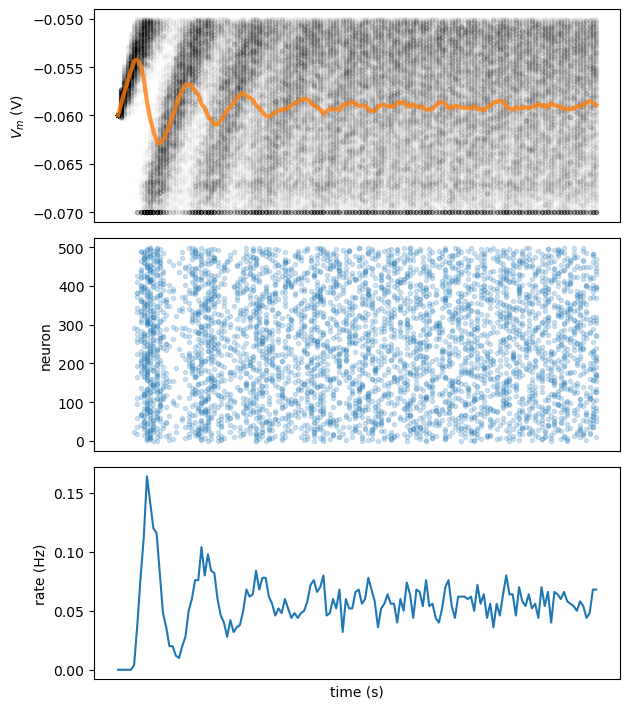

In [26]:
# Set random number generator
np.random.seed(2020)

# Initialize step_end, t_range, n, v_n and i
t_range = np.arange(0, t_max, dt)
step_end = len(t_range)
n = 500
v_n = el * np.ones([n, step_end])
i = i_mean * (1 + 0.1 * (t_max / dt)**(0.5) * (2 * np.random.random([n, step_end]) - 1))

# Initialize spikes and spikes_n
spikes = {j: [] for j in range(n)}
spikes_n = np.zeros([step_end])

for step, t in enumerate(t_range):

  # Skip first iteration
  if step == 0:
    continue

  # Compute v_n
  v_n[:, step] = v_n[:, step - 1] + (dt / tau) * (el - v_n[:, step - 1] + r*i[:, step])

  # Initialize boolean numpy array `spiked` with v_n > v_thr
  spiked = (v_n[:, step] > vth)

  # Set relevant values of v_n to resting potential using spiked
  v_n[spiked,step] = vr

  # Collect spike times
  for j in np.where(spiked)[0]:
    spikes[j] += [t]
    spikes_n[step] += 1

# Collect mean spiking rate
spikes_mean = spikes_n / n

# Plot multiple realizations of Vm, spikes and mean spike rate
plot_all(t_range, v_n, spikes=spikes, spikes_mean=spikes_mean)

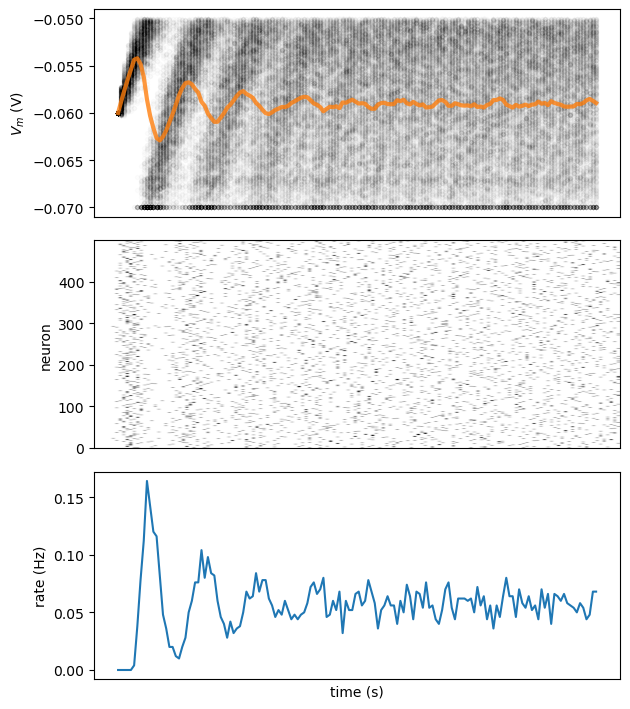

In [32]:
np.random.seed(2020)
t_range = np.arange(0, t_max, dt)
step_end = len(t_range)
n = 500
v_n = el * np.ones([n, step_end])
i = i_mean * (1 + 0.1 * (t_max / dt)**(0.5) * (2 * np.random.random([n, step_end]) - 1))
raster = np.zeros([n, step_end])

for step, t in enumerate(t_range):
    if step == 0:
        continue
    v_n[:, step] = v_n[:, step - 1] + (dt / tau) * (el - v_n[:, step - 1] + r*i[:, step])
    spiked = (v_n[:,step] >= vth)
    v_n[spiked,step] = vr

    raster[spiked, step] = 1.
plot_all(t_range, v_n, raster)

In [37]:
# Using Simulation class
class LIFNeurons:
    """
    Keep track of membrane potential for multiple realizations of LFI neurons, and performs single
    step discrete integration
    """
    def __init__(self, n, t_ref_mu=0.01, t_ref_sigma=0.002,
               tau=20e-3, el=-60e-3, vr=-70e-3, vth=-50e-3, r=100e6):
        # Neuron count
        self.n = n

        # Neuron Parameters
        self.tau = tau
        self.el = el
        self.vr = vr
        self.vth = vth
        self.r = r

        # Initialize refactory period
        self.t_ref_mu = t_ref_mu
        self.t_ref_sigma = t_ref_sigma
        self.t_ref = self.t_ref_mu + self.t_ref_sigma * np.random.normal(size=self.n)
        self.t_ref[self.t_ref < 0] = 0

        # State variables
        self.v = self.el * np.ones(self.n)
        self.spiked = self.v>=self.vth
        self.last_spike = -self.t_ref * np.ones([self.n])
        self.t = 0.
        self.steps = 0

    def ode_step(self, dt, i):

        # Update running time and steps
        self.t += dt
        self.steps += 1

        # One step of discrete time integration of dt
        self.v = self.v + dt / self.tau * (self.el - self.v + self.r * i)

        ####################################################
        ## TODO for students: complete the `ode_step` method
        # Fill out function and remove
        # raise NotImplementedError("Student exercise: complete the ode_step method")
        ####################################################

        # Spike and clamp
        self.spiked = (self.v >= self.vth)
        self.v[self.spiked] = self.vr
        self.last_spike[self.spiked] = self.t
        clamped = (self.t_ref > self.t-self.last_spike)
        self.v[clamped] = self.vr

        self.last_spike[self.spiked] = self.vr


Ran for 0.15s in 150 steps.


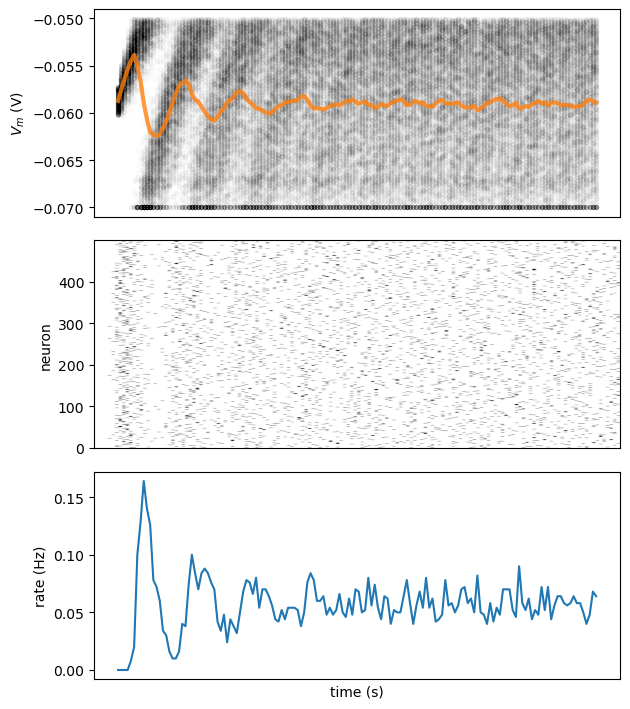

In [38]:
np.random.seed(2020)

# Initialize step_end, t_range, n, v_n and i
t_range = np.arange(0, t_max, dt)
step_end = len(t_range)
n = 500
v_n = el * np.ones([n, step_end])
i = i_mean * (1 + 0.1 * (t_max / dt)**(0.5) * (2 * np.random.random([n, step_end]) - 1))

# Initialize binary numpy array for raster plot
raster = np.zeros([n,step_end])

# Initialize neurons
neurons = LIFNeurons(n)

# Loop over time steps
for step, t in enumerate(t_range):

  # Call ode_step method
  neurons.ode_step(dt, i[:,step])

  # Log v_n and spike history
  v_n[:,step] = neurons.v
  raster[neurons.spiked, step] = 1.

# Report running time and steps
print(f'Ran for {neurons.t:.3}s in {neurons.steps} steps.')

# Plot multiple realizations of Vm, spikes and mean spike rate
plot_all(t_range, v_n, raster)